<b>The Wine quality Problem</b><br>

<b>Problem Statement</b>

Create a model that predicts the quality of wine based on the features provided<br>
Which features contribute the most to the quality of the wine<br> 


<b>Approach</b>

<ul>Perform the data preprocessing</ul>
<ul>Feature Selection</ul> 
<ul>Exploratory data analysis</ul>
<ul>Model building process</ul>
<ul>Random Forest classifier</ul> 
<ul>Support Vector Classifier</ul> 
<ul>Randomized searchCV on SVC</ul>













<b>Citation Request:</b>
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib


In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score 
from sklearn import metrics 
from sklearn.metrics import r2_score 

%matplotlib inline 

In [4]:
whitewine= pd.read_csv('/Users/mac/Downloads/Wine datasets/winequality-white.csv', header='infer', sep=';', na_values='unknown')

In [5]:
print(whitewine.shape)

(4898, 12)


In [6]:
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
whitewine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Feature Selection process using Random forest feature importances

In [9]:
y= whitewine['quality']
X= whitewine.drop(['quality'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)

In [11]:
X_test=sc.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
scores = {}

for n_estimators in range(2, 100):
    RF_model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    RF_model.fit(X_train, y_train)
    RF_predictions = RF_model.predict(X_test)
    RF_accuracy = accuracy_score(RF_predictions, y_test)
    scores[n_estimators] = RF_accuracy

In [14]:
best_n_estimators = []

for n_estimators, score in scores.items():
    if score == min(scores.values()):
        best_n_estimators.append(n_estimators)

print(f"Best Number of Estimators: {min(best_n_estimators)}")

Best Number of Estimators: 2


In [15]:
rfr = RandomForestClassifier(n_estimators=min(best_n_estimators), random_state=0)

rfr.fit(X_train, y_train)
score_train = rfr.score(X_train, y_train)
print('Training Accuracy : ' + str(score_train))

score_valid = rfr.score(X_test, y_test)
print('Validation Accuracy : ' + str(score_valid))

#print(classification_report(y_test, RF_model.predict(X_test)))

Training Accuracy : 0.8356304236855538
Validation Accuracy : 0.5581632653061225


In [16]:
feature_importances = pd.DataFrame(rfr.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances.head(7)

,index,importance
0,alcohol,0.135896
1,free sulfur dioxide,0.103436
2,density,0.096118
3,volatile acidity,0.095577
4,residual sugar,0.088072
5,sulphates,0.084687
6,chlorides,0.084420


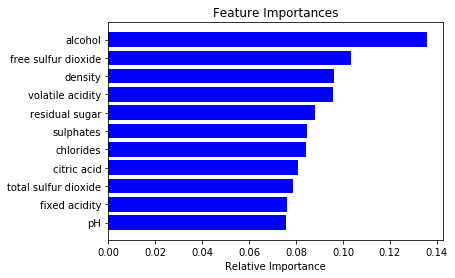

In [17]:
features = whitewine.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<b>Intuition</b>
In my opinion, the first 8 features are the most important, hence we will select them for modeling 

In [18]:
whitewine.drop(['fixed acidity','pH','total sulfur dioxide'],axis=1,inplace=True)
#chlorides, residual sugar

In [19]:
whitewine.head(3)

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,sulphates,alcohol,quality
0,0.27,0.36,20.7,0.045,45.0,1.0010,0.45,8.8,6
1,0.30,0.34,1.6,0.049,14.0,0.9940,0.49,9.5,6
2,0.28,0.40,6.9,0.050,30.0,0.9951,0.44,10.1,6


<b>Exploratory analysis</b><br>
Here we'll look at the relationships between the target('quality') and the features<br>
<br>
First we want to see how much of each feature is in which quality of wine<br>
Then we see how every feature affects the quality

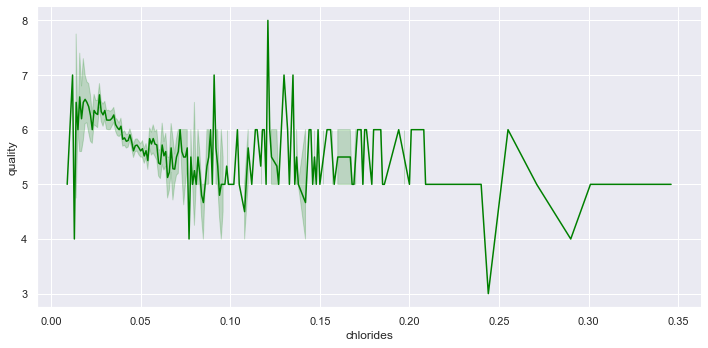

In [20]:
sns.set()
sns.relplot(data=whitewine, x='chlorides', y='quality', kind='line', height=5, aspect=2, color='green'); 

<b>Intuition</b><br>
A high amount of chlorides is present in average quality white wines 

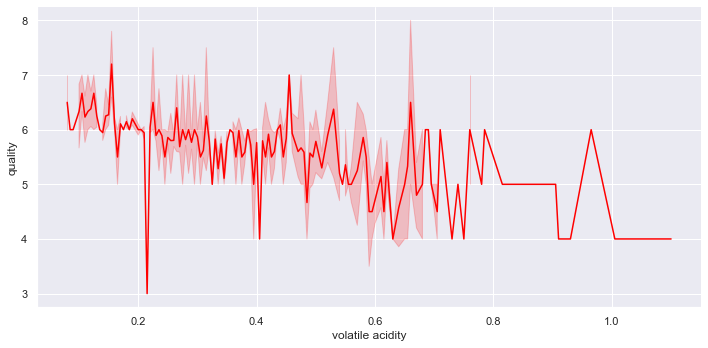

In [21]:
sns.set()
sns.relplot(data=whitewine, x='volatile acidity', y='quality', kind='line', height=5, aspect=2, color='red');  

<b>Intuition</b><br>
The lower the volatile acidity in white wine, the higher the quality 

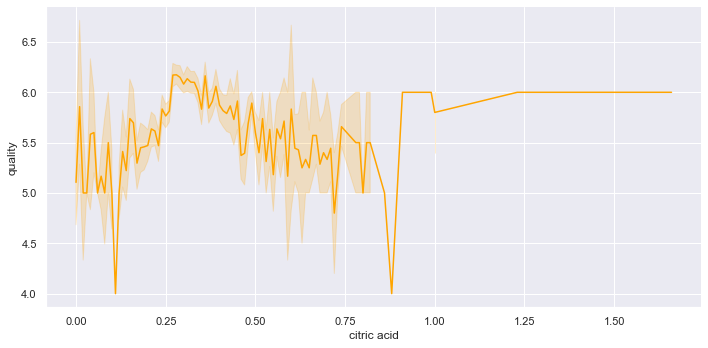

In [22]:
sns.set()
sns.relplot(data=whitewine, x='citric acid', y='quality', kind='line', height=5, aspect=2, color='orange');  

 <b>Intuition</b><br>
 There is a high concentration of citric acid in average quality white wine 

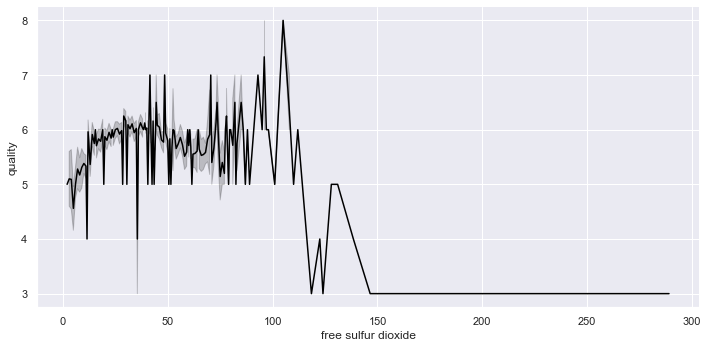

In [23]:
sns.set()
sns.relplot(data=whitewine, x='free sulfur dioxide', y='quality', kind='line', height=5, aspect=2, color='black');  

<b>Intuition</b><br>
A moderate amount of sulfur dioxide makes for average quality wine. An excess will reduce the wine quality to very poor

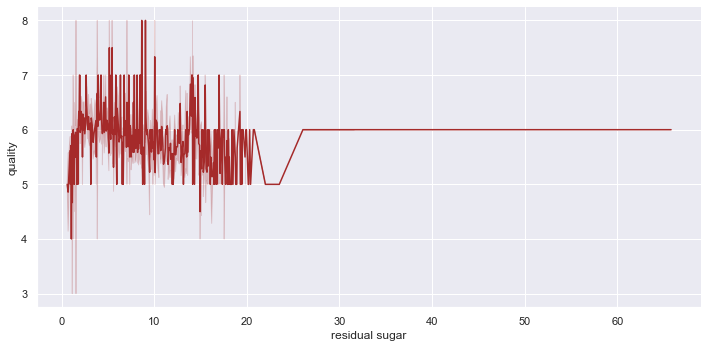

In [24]:
sns.set()
sns.relplot(data=whitewine, x='residual sugar', y='quality', kind='line', height=5, aspect=2, color='brown');  

<b>Intuition</b><br>
Average quality wine has a steady concentration of residual sugar 

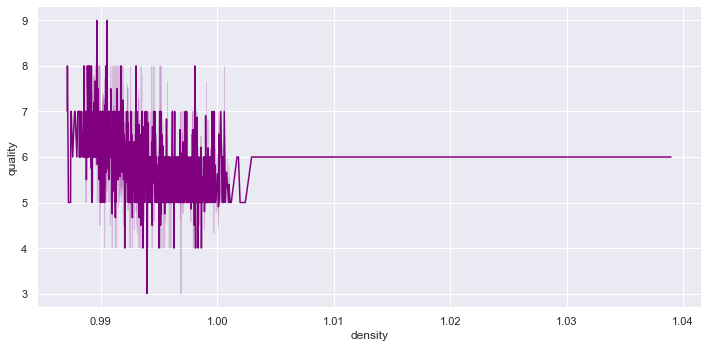

In [25]:
sns.set()
sns.relplot(data=whitewine, x='density', y='quality', kind='line', height=5, aspect=2, color='purple');  

<b>Intuition</b><br>
A high amount of density spreads across the average and excellent qualities of wine 

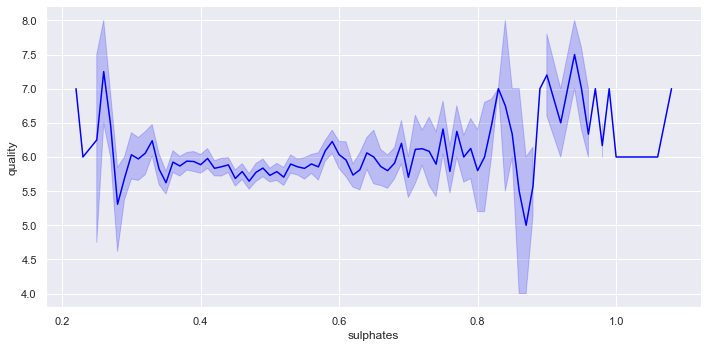

In [26]:
sns.set()
sns.relplot(data=whitewine, x='sulphates', y='quality', kind='line', height=5, aspect=2, color='blue');  

<b>Intuition</b><br>
The more sulphate in white wine, the better the quality 

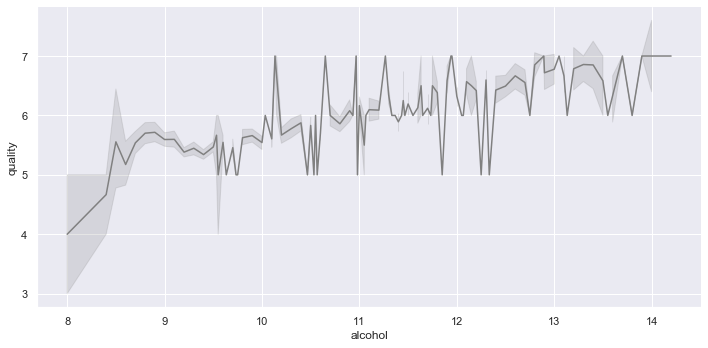

In [27]:
sns.set()
sns.relplot(data=whitewine, x='alcohol', y='quality', kind='line', height=5, aspect=2, color='grey');  

In [28]:
whitewine.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<b>Impact of the features on the wine quality</b>

In [29]:
whitewine.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

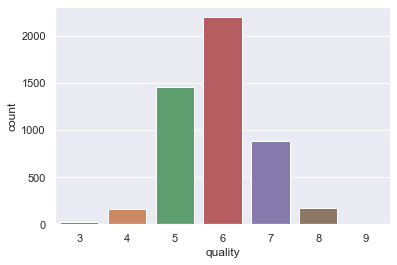

In [30]:
sns.countplot(x='quality',data=whitewine)

<b>Intuition</b><br>
Clearly 3 classes of the quality attribute<br>

In [31]:
whitewine.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [32]:
#First we create three quality types
labels = ['poor','average','excellent']
bins = [0,4.5,6.5,9]
whitewine['quality'] = pd.cut(whitewine['quality'],bins=bins,labels=labels)

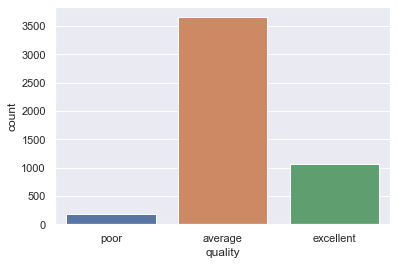

In [33]:
sns.countplot(whitewine['quality'])

<b>Intuition</b><br>
Majority of the wine in the collection is average wine, with a few rated as excellent

<b>Exploratory data analysis</b>

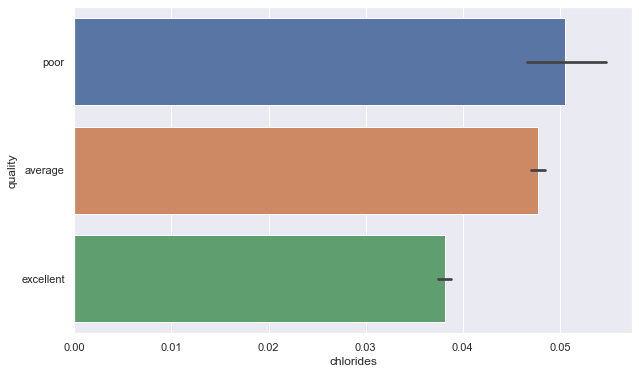

In [34]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'chlorides', y = 'quality', data = whitewine)

<b>Intuition</b><br>
An increase in chlorides leads to a fall in quality of white wine 

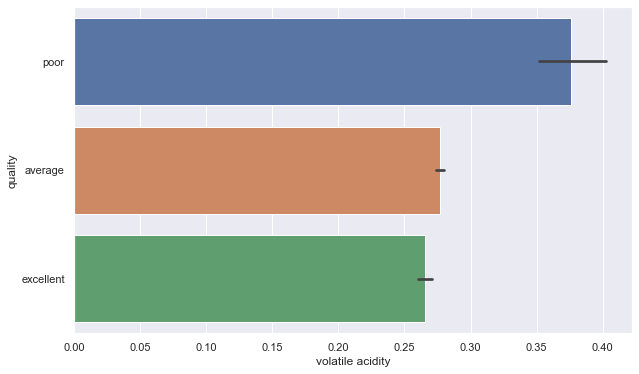

In [35]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='volatile acidity', y='quality', data=whitewine)

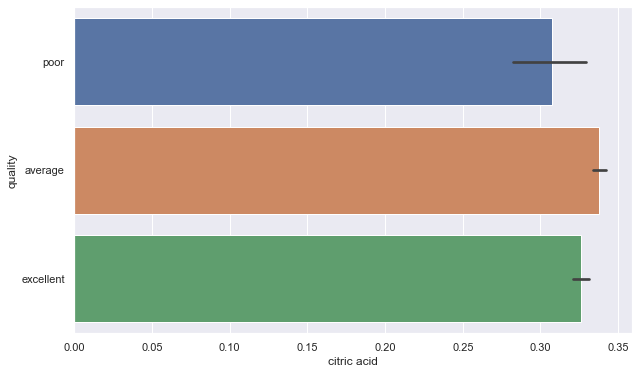

In [36]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='citric acid', y='quality', data=whitewine)

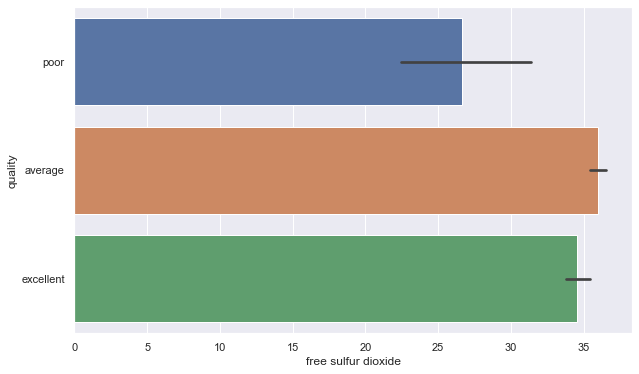

In [37]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='free sulfur dioxide', y='quality', data=whitewine)

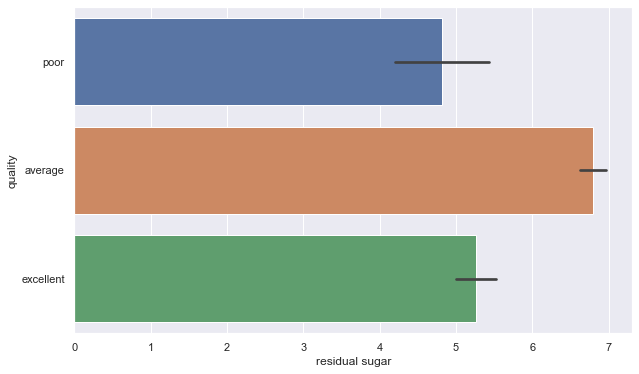

In [38]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='residual sugar', y='quality', data=whitewine)

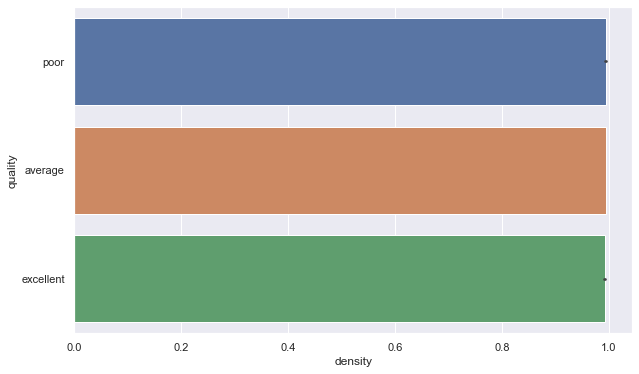

In [39]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='density', y='quality', data=whitewine)

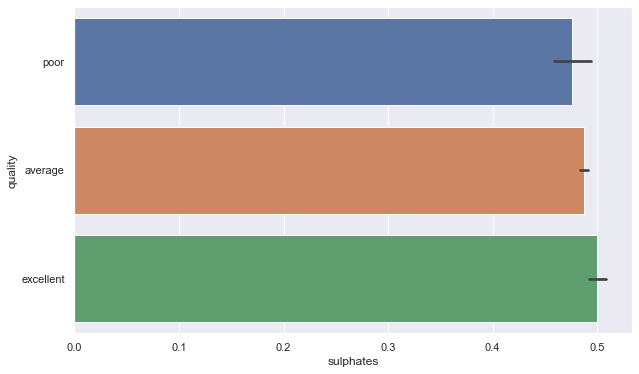

In [40]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='sulphates', y='quality', data=whitewine)

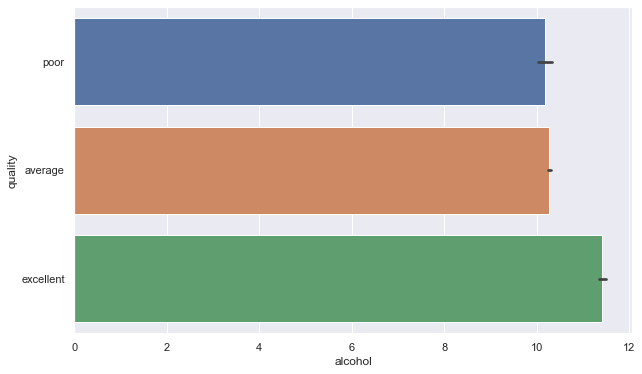

In [41]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='alcohol', y='quality', data=whitewine)

## The model building process

We're building two models. <br>

<ol>- Random Forest Classifer</ol> 
<ol>- Support Vector Classifier</ol>

<b>Random Forest Classifier</b>

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
whitewine['quality']=LabelEncoder().fit_transform(whitewine['quality'])

In [44]:
whitewine.quality.unique()

array([0, 1, 2])

In [45]:
y = whitewine['quality']
X = whitewine.drop(['quality'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=124)

In [46]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [47]:
scores = {}

for n_estimators in range(2, 100):
    RF_model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    RF_model.fit(X_train, y_train)
    RF_predictions = RF_model.predict(X_test)
    RF_accuracy = accuracy_score(RF_predictions, y_test)
    scores[n_estimators] = RF_accuracy

In [48]:
best_n_estimators = []

for n_estimators, score in scores.items():
    if score == min(scores.values()):
        best_n_estimators.append(n_estimators)

print(f"Best Number of Estimators: {min(best_n_estimators)}")

Best Number of Estimators: 2


In [49]:
rfr = RandomForestClassifier(n_estimators=min(best_n_estimators), random_state=0)

rfr.fit(X_train, y_train)
score_train = rfr.score(X_train, y_train)
print('Training Accuracy : ' + str(score_train))

score_valid = rfr.score(X_test, y_test)
print('Validation Accuracy : ' + str(score_valid))
print('')
#print(classification_report(y_test, RF_model.predict(X_test)))

Training Accuracy : 0.9086931155192532
Validation Accuracy : 0.7795918367346939



In [50]:
print(confusion_matrix(y_test,RF_model.predict(X_test)))

[[1029   62    2]
 [ 174  155    0]
 [  43    0    5]]


In [51]:
#Cross validation 
rfc_cv = cross_val_score(estimator = rfr, X = X_train, y = y_train, cv = 20)
rfc_cv.mean()

0.7984156126750988

<b>Support Vector Classifier using Random Search CV</b>

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline 

In [53]:
%%time
svc_rbf = Pipeline(steps=[
                      ('classifier', SVC())])
svc_rbf.set_params(classifier__kernel='rbf',classifier__C=1.2,
                   classifier__gamma=0.9,classifier__random_state=123)
#gamma low not overfitting, gamma high overfitting  
#similar to _C 
svc_rbf.fit(X_train,y_train)

CPU times: user 375 ms, sys: 11.7 ms, total: 387 ms
Wall time: 385 ms


Pipeline(steps=[('classifier', SVC(C=1.2, gamma=0.9, random_state=123))])

In [54]:
train_pred =svc_rbf.predict(X_train)
test_pred = svc_rbf.predict(X_test)

In [55]:
from sklearn.metrics import precision_score,recall_score,accuracy_score, f1_score

In [56]:
print('Accuracy:', accuracy_score(y_test, test_pred))
print('F1 score:', f1_score(y_test,test_pred, average='micro')) 
print ('Recall:', recall_score(y_test,test_pred,average='micro'))
print ('Precision:', precision_score(y_test, test_pred, average='micro'))

Accuracy: 0.7829931972789116
F1 score: 0.7829931972789116
Recall: 0.7829931972789116
Precision: 0.7829931972789116


<b>Perform a Randomized Search CV</b>

In [55]:
'''%%time
clf_svc = Pipeline(steps=[('classifier', SVC())])
svc_param_random = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100 ], 
                'classifier__gamma':[0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
                 "classifier__kernel":['linear', 'rbf', 'poly' ]}

svc_grid_bal = RandomizedSearchCV(clf_svc, param_distributions=svc_param_random,
                                cv=2)
svc_grid_bal.fit(X_train,y_train)
'''

'%%time\nclf_svc = Pipeline(steps=[(\'classifier\', SVC())])\nsvc_param_random = {\'classifier__C\': [0.001, 0.01, 0.1, 1, 10, 100 ], \n                \'classifier__gamma\':[0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], \n                 "classifier__kernel":[\'linear\', \'rbf\', \'poly\' ]}\n\nsvc_grid_bal = RandomizedSearchCV(clf_svc, param_distributions=svc_param_random,\n                                cv=2)\nsvc_grid_bal.fit(X_train,y_train)\n'

In [ ]:
'''train_pred = svc_grid_bal.fit(X_train).reshape[1,-1][0]
test_pred = svc_grid_bal.fit(X_test).reshape[1,-1][0]
'''